<a href="https://www.kaggle.com/code/pedrobuc/convol-alinhada?scriptVersionId=248545897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Convolucional - Alinhadas

Pedro Buczinski Lages de Carvalho - 12555266

In [1]:
import numpy as np
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

2025-07-02 18:56:32.937719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751482593.141976      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751482593.198656      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
kirmizi_alinhada = '/kaggle/input/alinha/imagens_processadas/Kirmizi_Pistachio_alinhada'
siirt_alinhada = '/kaggle/input/alinha/imagens_processadas/Siirt_Pistachio_alinhada'

images = []
labels = []

# Ler imagens de cada pasta
for file in os.listdir(kirmizi_alinhada):
    path = os.path.join(kirmizi_alinhada, file)
    img = cv2.imread(path)
    images.append(img)
    labels.append(0) #atribuo label 0 para kirmizi e 1 para siirt

for file in os.listdir(siirt_alinhada):
    path = os.path.join(siirt_alinhada, file)
    img = cv2.imread(path)
    images.append(img)
    labels.append(1)


X = np.array(images, dtype='float32') / 255.0
y = np.array(labels)

In [3]:
# Ajuste de hiperparâmetros

# passo de adaptação
eta = 0.0001

# Tamanho do mini-batch
Nb = 16

# Número de épocas
Ne = 50

In [4]:
train_size = 200
test_size = X.shape[0] - train_size

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
X_train_rgb = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in X_train])
X_test_rgb = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in X_test])

y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

Redimensionando e pré-processando imagens para 150x150...

Carregando modelo base InceptionV3...


I0000 00:00:1751482613.866485      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Construindo classificador customizado...
Configurando modelo para fine-tuning imediato...

Configurando o gerador de data augmentation...

Iniciando treino otimizado por até 50 épocas...
Epoch 1/50


I0000 00:00:1751482639.303786      58 service.cc:148] XLA service 0x7fc5300027f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751482639.304602      58 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751482641.756496      58 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5486 - loss: 0.8641 

I0000 00:00:1751482651.620544      58 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6235 - loss: 0.9417 - val_accuracy: 0.7675 - val_loss: 0.8493 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.7179 - loss: 0.5858 - val_accuracy: 0.7136 - val_loss: 1.6709 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.7235 - loss: 0.5277 - val_accuracy: 0.7069 - val_loss: 3.2670 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.8380 - loss: 0.3697 - val_accuracy: 0.7459 - val_loss: 2.9869 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8745 - loss: 0.3379 - val_accuracy: 0.7926 - val_loss: 1.4360 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8627 - loss: 0.3187
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.8621 - loss: 0.3195 - val_accuracy: 

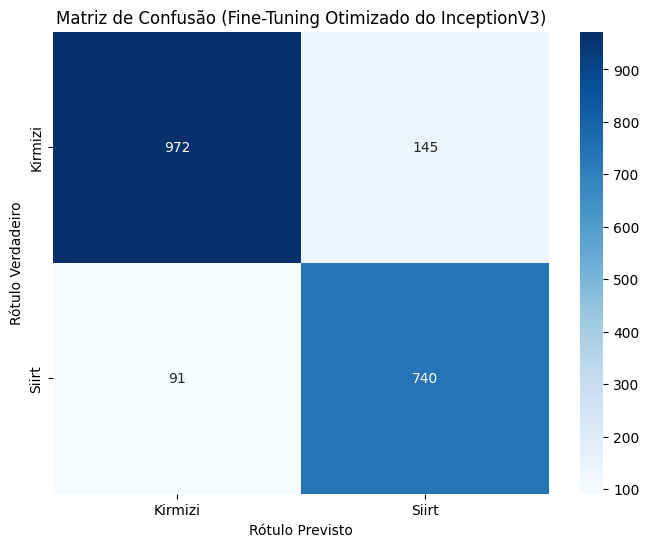

In [6]:
IMG_SIZE = 150

def preprocess_images(images, size):
    processed = []
    for img in images:
        # Redimensiona a imagem
        img_resized = cv2.resize(img, (size, size))
        # Converte de BGR para RGB
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        processed.append(img_rgb)
    return np.array(processed)

print(f"Redimensionando e pré-processando imagens para {IMG_SIZE}x{IMG_SIZE}...")
X_train_processed = preprocess_images(X_train, IMG_SIZE)
X_test_processed = preprocess_images(X_test, IMG_SIZE)


# Carrega o modelo InceptionV3 com pesos pré-treinados no ImageNet.
print("\nCarregando modelo base InceptionV3...")
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Constrói um novo classificador no topo do modelo base.
print("Construindo classificador customizado...")
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Descongelamos as camadas superiores do modelo base para o ajuste fino desde o início.
print("Configurando modelo para fine-tuning imediato...")
base_model.trainable = True
for layer in base_model.layers[:249]:
    layer.trainable = False

# Compilamos o modelo uma única vez com uma taxa de aprendizado balanceada.
model.compile(optimizer=Adam(learning_rate=1e-3), # 0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("\nConfigurando o gerador de data augmentation...")
datagen = ImageDataGenerator(
    #rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(X_train_processed, y_train_cat, batch_size=Nb)

# Definimos os callbacks para otimizar o treino.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)


print(f"\nIniciando treino otimizado por até {Ne} épocas...")
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=Ne,
    validation_data=(X_test_processed, y_test_cat),
    callbacks=[early_stopping, reduce_lr], # Usando os callbacks
    verbose=1
)

print("\nAnalisando o modelo final no conjunto de teste (melhores pesos restaurados)...")
loss, accuracy = model.evaluate(X_test_processed, y_test_cat, verbose=0)
print(f"Acurácia no Teste: {accuracy * 100:.2f}%")
print(f"Loss no Teste: {loss:.4f}")

# Gera um relatório de classificação e uma matriz de confusão.
y_pred_probs = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_classes, target_names=['Kirmizi', 'Siirt']))

print("Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kirmizi', 'Siirt'], yticklabels=['Kirmizi', 'Siirt'])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão (Fine-Tuning Otimizado do InceptionV3)')
plt.show()



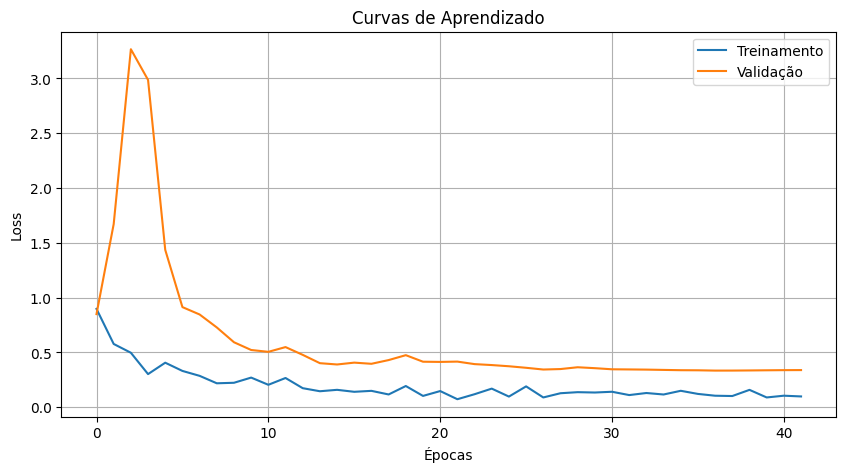

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))
plt.plot(train_loss, label="Treinamento")
plt.plot(val_loss, label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Curvas de Aprendizado")
plt.legend()
plt.grid(True)
plt.show()